In [1]:
!mkdir -p ~/aiffel/songys_chatbot

좋은 질문입니다. 이전 답변에서 저는 트랜스포머에서 $(\sqrt{d})$를 사용하는 이유를 점곱의 크기를 조절하여 소프트맥스 함수의 출력을 안정화시키기 위함이라고 설명했습니다. 이제, 이를 바탕으로 비판적으로 분석하고, 왜 $\sqrt{d}$를 사용하는지 다시 한번 설명하겠습니다.

### 이전 설명의 비판

1. **벡터 분포의 가정**:
   이전 답변에서는 Q와 K 벡터가 초기화될 때 정규 분포를 따를 수 있다고 설명했지만, 실제로 훈련 과정에서 데이터에 따라 Q와 K 벡터의 분포는 변화하게 됩니다. 즉, Q와 K 벡터가 반드시 평균이 0이고 분산이 1인 정규 분포를 따르지는 않습니다. 그러므로, $\sqrt{d}$로 나누는 이유를 단순히 분포의 특성에 기반하여 설명하는 것은 부적절할 수 있습니다.

2. **점곱의 스케일**:
   이전에 설명한 대로, Q와 K 벡터의 점곱은 벡터의 차원이 커질수록 값이 커질 수 있습니다. 그러나, 점곱이 반드시 평균이 0이고 분산이 $d$인 정규 분포를 따르지 않을 수 있습니다. 그렇다면, $\sqrt{d}$로 나누는 것이 적절한가에 대한 의문이 생길 수 있습니다.

### \(\sqrt{d}\)를 사용하는 이유

트랜스포머에서 $\sqrt{d}$를 사용하는 이유를 다시 설명해 보겠습니다:

1. **점곱의 스케일 조절**:
   Q와 K 벡터의 점곱은 일반적으로 벡터의 차원이 커질수록 값이 커집니다. 이때 $\sqrt{d}$로 나누는 것은 점곱의 크기를 일정하게 유지하여 소프트맥스 함수의 입력 값이 지나치게 크거나 작아지지 않도록 하는 역할을 합니다. 이는 소프트맥스 함수의 출력이 균형 잡히고 안정적으로 유지되도록 합니다.

2. **차원 수에 따른 영향 상쇄**:
   벡터의 차원이 커질수록 각 성분의 점곱의 합이 커지게 됩니다. $\sqrt{d}$로 나누는 것은 이 차원의 증가에 따른 영향을 상쇄시키기 위한 것입니다. 이렇게 하면 차원이 증가하더라도 점곱의 크기가 적절한 범위 내에 머무르게 되어, 모델이 효과적으로 학습할 수 있습니다.

3. **경험적 결과**:
   트랜스포머 모델이 처음 제안된 논문에서 $\sqrt{d}$로 나누는 방법을 사용했고, 이는 실험적으로 매우 좋은 성능을 보였습니다. 따라서, $\sqrt{d}$로 나누는 것은 이론적인 이유뿐만 아니라 실험적으로도 검증된 방법입니다.

4. **수학적 타당성**:
   점곱의 기대값이 0이고 분산이 $d$일 때, $\sqrt{d}$로 나누면 결과가 분산이 1인 정규화된 값이 됩니다. 이는 수학적으로 점곱의 값이 큰 범위로 퍼지지 않도록 하는 역할을 합니다.

### 결론

트랜스포머 모델에서 $\sqrt{d}$를 사용하는 이유는 점곱의 크기를 조절하여 소프트맥스 함수의 출력을 안정화시키고, 벡터의 차원이 증가함에 따라 점곱 값이 과도하게 커지는 것을 방지하기 위함입니다. 이는 수학적으로 타당하며, 경험적으로도 검증된 방법입니다. 따라서, $\sqrt{d}$는 Q와 K 벡터가 어떤 분포를 따르든 간에 점곱의 스케일을 적절하게 조절하는 효과적인 방법입니다.

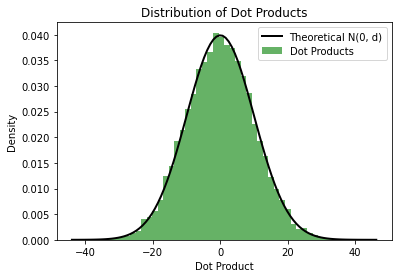

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 설정
d = 100  # 벡터의 차원
num_samples = 10000  # 샘플 수

# 두 벡터의 각 성분을 N(0, 1)에서 샘플링
q = np.random.normal(0, 1, (num_samples, d))
k = np.random.normal(0, 1, (num_samples, d))

# 점곱 계산
dot_products = np.sum(q * k, axis=1)

# 이론적 분포
mean_theoretical = 0
std_dev_theoretical = np.sqrt(d)
dist_theoretical = np.random.normal(mean_theoretical, std_dev_theoretical, num_samples)

# 히스토그램과 이론적 분포 비교
plt.hist(dot_products, bins=50, density=True, alpha=0.6, color='g', label='Dot Products')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_theoretical, std_dev_theoretical)
plt.plot(x, p, 'k', linewidth=2, label='Theoretical N(0, d)')

plt.title('Distribution of Dot Products')
plt.xlabel('Dot Product')
plt.ylabel('Density')
plt.legend()
plt.show()


self attention score

- Q1. embedding layer는 어떻게 학습해? y label을 뭘로?
- Q2. 문장 안의 각 단어들을 임베딩화 시킨다음, dot product을 하면 각 단어끼리의 coefficient 즉 유사도가 나올 것이고 이를 softmax하면 

한 문장을 embedding화 시킨다음

[[1.99699042 1.16238762 1.82434194 0.50851009]
 [1.16238762 1.50322254 1.86033803 0.36995757]
 [1.82434194 1.86033803 3.15421447 0.85461761]
 [0.50851009 0.36995757 0.85461761 0.37260108]]


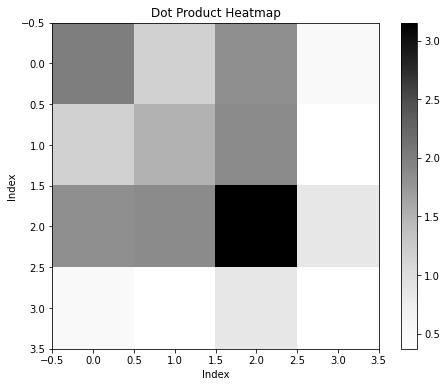

In [10]:
import numpy as np

v = np.random.rand(4,5)
dot_product = np.dot(v, np.transpose(v))
print(dot_product)
plt.figure(figsize=(8, 6))
plt.imshow(dot_product, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title("Dot Product Heatmap")
plt.xlabel("Index")
plt.ylabel("Index")
plt.show()

In [23]:
import tensorflow as tf

x = tf.constant([[[ 7,  8,  9],
                  [10, 11, 12]]])
print(x)
print(tf.transpose(x)) # default perm=[2,1,0]
print(tf.transpose(x, perm=[0, 2, 1]))

tf.Tensor(
[[[ 7  8  9]
  [10 11 12]]], shape=(1, 2, 3), dtype=int32)
tf.Tensor(
[[[ 7]
  [10]]

 [[ 8]
  [11]]

 [[ 9]
  [12]]], shape=(3, 2, 1), dtype=int32)
tf.Tensor(
[[[ 7 10]
  [ 8 11]
  [ 9 12]]], shape=(1, 3, 2), dtype=int32)


In [27]:
x = tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])
print(x)
print(x[:, tf.newaxis, tf.newaxis, :])

tf.Tensor(
[[1 2 0 3 0]
 [0 0 0 4 5]], shape=(2, 5), dtype=int32)
tf.Tensor(
[[[[1 2 0 3 0]]]


 [[[0 0 0 4 5]]]], shape=(2, 1, 1, 5), dtype=int32)


# Transformer

- 교사 강요(Teacher Forcing)을 사용하여 훈련 (지금까지의 단어 -> 다음 단어 예측)
- encoder-decoder + attention(3가지 종류) + FFNN(dropout + layer norm)
- attention
    - multi-head attention
        - self attention
        - masked self attention
    - encoder-decoder attention

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# BroadCasting

> 브로드캐스팅의 작동 방식에 따라 `position * angles` 연산이 어떻게 수행되는지 단계별로 설명

### 1. 초기 텐서 형태
- `position` 텐서: shape (50, 1)
- `angles` 텐서: shape (1, 128)

### 2. 브로드캐스팅 규칙 적용

1. **`position` 텐서의 확장**:
   - `position` 텐서의 shape은 (50, 1)입니다.
   - 브로드캐스팅 규칙에 따라, `position` 텐서는 두 번째 차원에서 1이 128로 확장됩니다.
   - 결과적으로 `position` 텐서는 (50, 128)로 확장되며, 각 행은 원래 첫 번째 열의 값을 복사하여 확장됩니다.

   예를 들어:
   ```python
   position = [[0], [1], [2], ..., [49]]  # shape: (50, 1)
   ```
   이 텐서는 다음과 같이 확장됩니다:
   ```python
   position = [
       [0, 0, 0, ..., 0],    # 50 행, 각 행은 첫 번째 열의 값을 복사
       [1, 1, 1, ..., 1],
       [2, 2, 2, ..., 2],
       ...,
       [49, 49, 49, ..., 49]
   ]  # shape: (50, 128)
   ```

2. **`angles` 텐서의 확장**:
   - `angles` 텐서의 shape은 (1, 128)입니다.
   - 브로드캐스팅 규칙에 따라, `angles` 텐서는 첫 번째 차원에서 1이 50으로 확장됩니다.
   - 결과적으로 `angles` 텐서는 (50, 128)로 확장되며, 각 열은 원래 첫 번째 행의 값을 복사하여 확장됩니다.

   예를 들어:
   ```python
   angles = [[angle_1, angle_2, angle_3, ..., angle_128]]  # shape: (1, 128)
   ```
   이 텐서는 다음과 같이 확장됩니다:
   ```python
   angles = [
       [angle_1, angle_2, angle_3, ..., angle_128],    # 128 열, 각 열은 첫 번째 행의 값을 복사
       [angle_1, angle_2, angle_3, ..., angle_128],
       [angle_1, angle_2, angle_3, ..., angle_128],
       ...,
       [angle_1, angle_2, angle_3, ..., angle_128]
   ]  # shape: (50, 128)
   ```

### 3. 요소별 곱셈
브로드캐스팅이 적용된 두 텐서 `position`과 `angles`는 이제 동일한 shape (50, 128)을 가지므로 요소별 곱셈이 가능합니다.

```python
result = position * angles  # shape: (50, 128)
```

결과적으로, 각 요소는 `position` 텐서의 확장된 값과 `angles` 텐서의 확장된 값을 곱한 결과가 됩니다.

예를 들어:
```python
result = [
    [0*angle_1, 0*angle_2, 0*angle_3, ..., 0*angle_128],    # 첫 번째 행
    [1*angle_1, 1*angle_2, 1*angle_3, ..., 1*angle_128],    # 두 번째 행
    [2*angle_1, 2*angle_2, 2*angle_3, ..., 2*angle_128],    # 세 번째 행
    ...,
    [49*angle_1, 49*angle_2, 49*angle_3, ..., 49*angle_128] # 마지막 행
]  # shape: (50, 128)
```

따라서, `position`과 `angles`의 브로드캐스팅에 따른 곱셈은 위에서 설명한 대로 동작합니다.

In [50]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

    def __init__(self, position=50, d_model=128):
        super(PositionalEncoding, self).__init__()
        # (1, 50, 128)
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles  # broadcasting (50, 128)

    def positional_encoding(self, position, d_model):
        # 각도 배열 생성 (50, 128)
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],  # (50, 1)
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],  # (1, 128)
            d_model=d_model,
        )

        # 배열의 짝수 인덱스에는 sin 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])  # (50, 64)
        # 배열의 홀수 인덱스에는 cosine 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])  # (50, 64)

        # sin과 cosine이 교차되도록 재배열
        pos_encoding = tf.stack([sines, cosines], axis=0)  # (2, 50, 64)
        # Transpose시 0축(2)가 2축으로 보낼 때, z축이 합쳐지면서 2개의 row로 pair가 만들어진다.
        # [[1,1], [2,2]] -> [[1,2], [1,2]]
        pos_encoding = tf.transpose(pos_encoding, [1, 2, 0])  # (50, 64, 2)
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])  # (50, 128)

        pos_encoding = pos_encoding[tf.newaxis, ...]  # (1, 50, 128)
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, : tf.shape(inputs)[1], :]


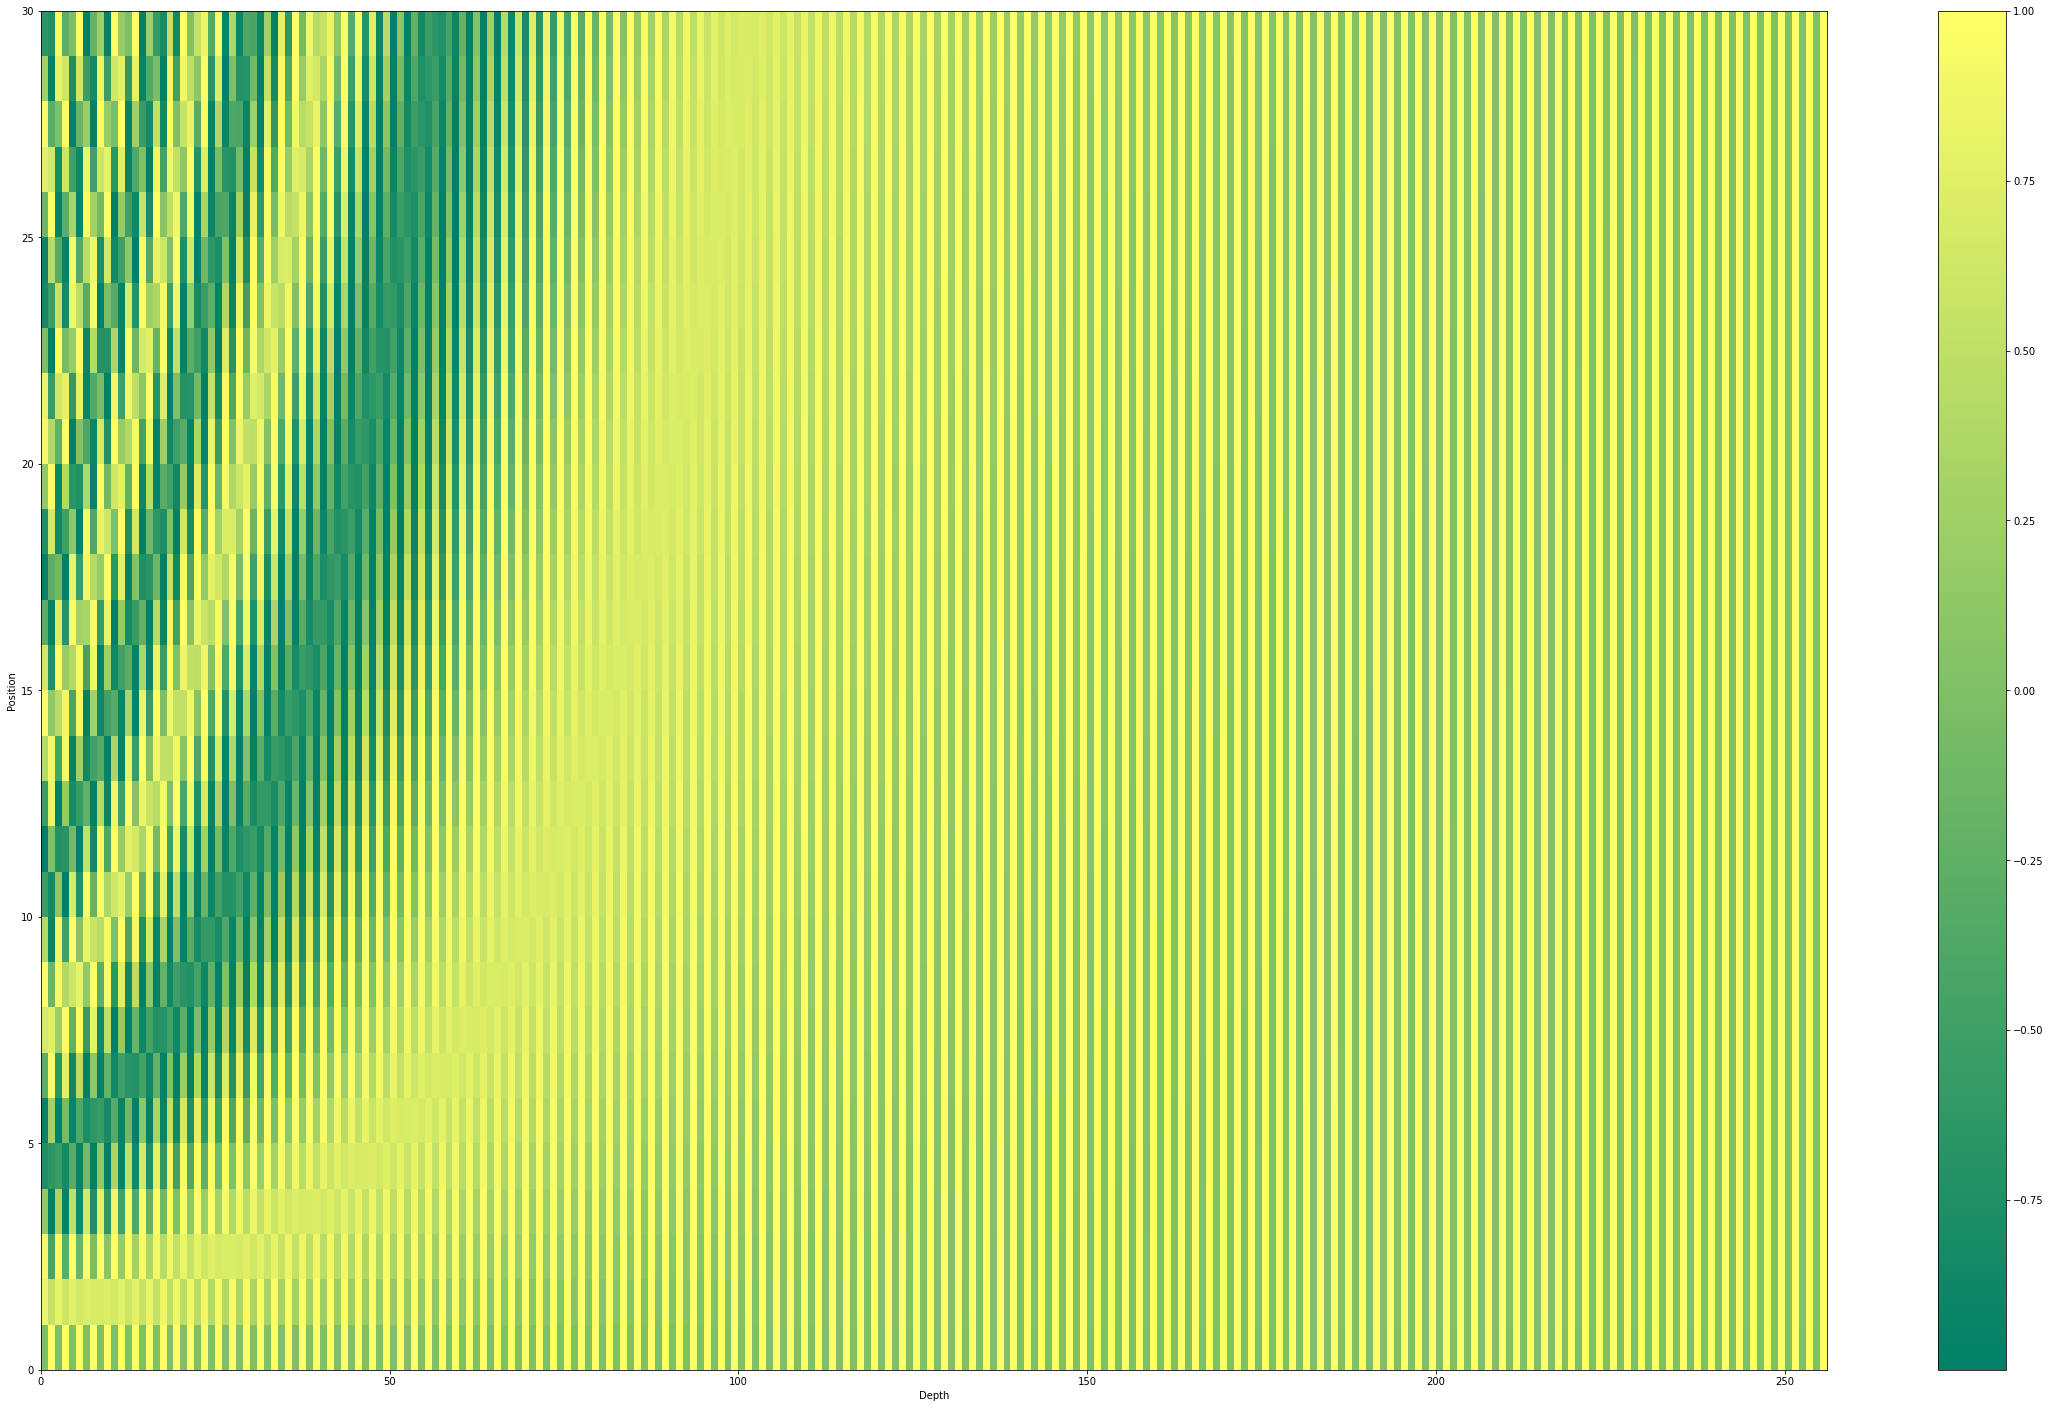

In [9]:
dim = 256
sample_pos_encoding = PositionalEncoding(30, dim)
plt.figure(figsize=(40,25))
plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='summer')
plt.xlabel('Depth')
plt.xlim((0, dim))
plt.ylabel('Position')
plt.colorbar()
plt.show()

x축을 본다면, sin과 cos이 번갈아가면서 표현된다는 것을 알 수 있습니다.

In [42]:
def scaled_dot_product_attention(query, key, value, mask):
    """
    query: (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    key: (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    value: (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    padding_mask : (batch_size, 1, 1, key의 문장 길이)
    """

    # Q와 K의 곱. 어텐션 스코어 행렬.
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    depth = tf.cast(tf.shape(key)[-1], tf.float32)  # 헤드로 쪼개진 embedding 크기
    logits = matmul_qk / tf.math.sqrt(depth)  # 스케일링, dk의 루트값으로 나눠준다.

    # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값(-inf)을 넣는다.
    # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
    if mask is not None:
        logits += (mask * -1e9) # FYI, 0은 softmax에서 양수값을 가진다. 

    # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
    # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
    attention_weights = tf.nn.softmax(logits, axis=-1)

    # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    output = tf.matmul(attention_weights, value)
    return output, attention_weights

# MultiHeadAttention
> 멀티 헤드 어텐션에서는 크게 두 종류의 가중치 행렬이 나왔습니다. Q, K, V 행렬을 만들기 위한 가중치 행렬인 WQ, WK, WV 행렬과 바로 어텐션 헤드들을 연결(concatenation) 후에 곱해주는 WO 행렬입니다

1. WQ, WK, WV에 해당하는 d_model 크기의 밀집층(Dense layer)을 지나게한다.
2. 지정된 헤드 수(num_heads)만큼 나눈다(split).
3. 스케일드 닷 프로덕트 어텐션.
4. 나눠졌던 헤드들을 연결(concatenatetion)한다.
5. WO에 해당하는 밀집층을 지나게 한다.

In [43]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        # d_model을 num_heads로 나눈 값.
        # 논문 기준 : 64 (512 // 8)
        self.depth = d_model // self.num_heads

        # WQ, WK, WV에 해당하는 밀집층 정의
        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        # WO에 해당하는 밀집층 정의
        self.dense = tf.keras.layers.Dense(units=d_model)

    # num_heads 개수만큼 q, k, v를 split하는 함수
    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3]) # (batch, heads, max 문장 토큰 갯수, 64)

    def call(self, inputs):
        query, key, value, mask = (
            inputs["query"],
            inputs["key"],
            inputs["value"],
            inputs["mask"],
        )
        batch_size = tf.shape(query)[0]

        # 1. WQ, WK, WV에 해당하는 밀집층 지나기
        # q : (batch_size, query의 문장 길이, d_model)
        # k : (batch_size, key의 문장 길이, d_model)
        # v : (batch_size, value의 문장 길이, d_model)
        # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # 2. 헤드 나누기
        # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
        # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
        # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
        # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # 4. 헤드 연결(concatenate)하기
        # (batch_size, query의 문장 길이, d_model)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))

        # 5. WO에 해당하는 밀집층 지나기
        # (batch_size, query의 문장 길이, d_model)
        outputs = self.dense(concat_attention)

        return outputs


# Padding Masking
> 0은 실제 의미가 있는 단어가 아니므로 실제 어텐션 등과 같은 연산에서는 제외할 필요가 있습니다. 패딩 마스킹은 이를 위해 숫자 0인 위치를 체크합니다.

In [44]:
def create_padding_mask(x):
    # x = (batch_size, max 문장 토큰 수)
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, sequence length)    
    return mask[:, tf.newaxis, tf.newaxis, :]

In [13]:
# 테스트 해보기
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


# Encoder

1. inputs, padding_mask
2. 첫번째 서브레이어 (`Self-Attention`)
    - self attention (multi head attention)
    - dropout
    - Residual conn (`inputs + attention`
    - Layer normalization (d_model 방향)
3. 두번째 서브레이어 (`Feed Forward Neural Network`)
    - outputs = Dense(relu)
    - Residual conn (`attention + outputs`)
    - Layer normalization

### Layer normalization

- 층 정규화는 텐서의 마지막 차원에 대해서 평균과 분산을 구하고, 이를 가지고 을 통해 값을 정규화하여 학습을 돕습니다.
- 여기서 텐서의 마지막 차원이란 것은 트랜스포머에서는 $d_{\text{model}}$ 차원을 의미합니다 

![](https://wikidocs.net/images/page/31379/layer_norm_new_1_final.PNG)

---

In [45]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    # 인코더는 패딩 마스크 사용, 디코더는 look ahead mask 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # (1)서브 레이어: 멀티 헤드 어텐션 수행 (self-attention)
    attention = MultiHeadAttention(d_model, num_heads, name="attention")(
        {
            "query": inputs,
            "key": inputs,
            "value": inputs,   # Q = K = V
            "mask": padding_mask, # # 패딩 마스크 사용
        }
    ) # (batch_size, query의 문장 길이, d_model)

    # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs + attention)

    # (2)서브 레이어: 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation="relu")(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)


def encoder(vocab_size, num_layers, units, d_model, num_heads, dropout, name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # num_layers만큼 쌓아올린 인코더의 층.
    for i in range(num_layers):
        outputs = encoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="encoder_layer_{}".format(i),
        )([outputs, padding_mask])

    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)


![](http://jalammar.github.io/images/t/transformer_resideual_layer_norm.png)

![](http://jalammar.github.io/images/t/transformer_resideual_layer_norm_2.png)

# 2. Decoder
**디코더는 세 개의 서브 층으로 구성됩니다.**

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_23_vBHZ3i0.max-800x600.png)


1. 셀프 어텐션 (Masked self attention)
    - Q: Mask된 decoder input
    - K, V = decoder input
2. 인코더-디코더 어텐션
    - Q = 디코더 output
    - K, V = 인코더 output
3. 피드 포워드 신경망 

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_24_Kj9egLY.max-800x600.png)

> 인코더의 셀프 어텐션과 마찬가지로 디코더의 셀프 어텐션, 인코더-디코더 어텐션 두 개의 어텐션 모두 스케일드 닷 프로덕트 어텐션을 멀티 헤드 어텐션으로 병렬적으로 수행합니다.


### 1. self-attention with look ahead mask

![](https://wikidocs.net/images/page/31379/decoder.PNG)

![](https://wikidocs.net/images/page/31379/decoder_attention_score_matrix.PNG)


## 2-1. Look ahead masking
> Decoder(1) 다음 단어 가리는 방법 

![](https://wikidocs.net/images/page/31379/%EB%A3%A9%EC%96%B4%ED%97%A4%EB%93%9C%EB%A7%88%EC%8A%A4%ED%81%AC.PNG)

- 인코더의 셀프 어텐션 : 패딩 마스크를 전달
- 디코더의 첫번째 서브층인 마스크드 셀프 어텐션 : 룩-어헤드 마스크를 전달 <-- 지금 설명하고 있음.
- 디코더의 두번째 서브층인 인코더-디코더 어텐션 : 패딩 마스크를 전달


우리가 원하는 것은 이전 단어들로부터 다음 단어를 예측하는 훈련을 제대로 하는 것입니다. 하지만 트랜스포머는, RNN과 달리 전체 문장이 문장 행렬로 들어가기 때문에 "미래의 단어"까지 Input으로 들어가게 됩니다.

> 이러한 문제를 해결하기 위해 자신보다 다음에 나올 단어를 참고하지 않도록 가리는 기법이 룩 어헤드 마스킹 기법입니다.


**룩-어헤드 마스크(look-ahead mask)는 디코더의 첫번째 서브층에서 이루어집니다.**


In [46]:
# 가릴곳: 1, 참조할곳: 0
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(
        tf.ones((seq_len, seq_len)), -1, 0
    )
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)

create_look_ahead_mask(tf.constant([[1, 2, 3, 4, 5]]))

<tf.Tensor: shape=(1, 1, 5, 5), dtype=float32, numpy=
array([[[[0., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1.],
         [0., 0., 0., 1., 1.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

## 2-2. Encoder-Decoder attention

```
인코더의 첫번째 서브층 : Query = Key = Value
디코더의 첫번째 서브층 : Query = Key = Value
디코더의 두번째 서브층 : Query : 디코더 행렬 / Key = Value : 인코더 행렬

```

![](https://wikidocs.net/images/page/31379/%EB%94%94%EC%BD%94%EB%8D%94%EB%91%90%EB%B2%88%EC%A7%B8%EC%84%9C%EB%B8%8C%EC%B8%B5.PNG)

두 개의 화살표는 각각 Key와 Value를 의미하며 이는 인코더의 마지막 층에서 온 행렬로부터 얻습니다. 반면 Query는 디코더의 첫번째 서브층의 결과 행렬로부터 습니다.

![](https://wikidocs.net/images/page/31379/%EB%94%94%EC%BD%94%EB%8D%94%EB%91%90%EB%B2%88%EC%A7%B8%EC%84%9C%EB%B8%8C%EC%B8%B5%EC%9D%98%EC%96%B4%ED%85%90%EC%85%98%EC%8A%A4%EC%BD%94%EC%96%B4%ED%96%89%EB%A0%AC_final.PNG)


In [47]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention1 = MultiHeadAttention(d_model, num_heads, name="attention_1")(
        inputs={
            "query": inputs,
            "key": inputs,
            "value": inputs,
            "mask": look_ahead_mask,
        }
    )

    # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention1 + inputs)

    # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
    attention2 = MultiHeadAttention(d_model, num_heads, name="attention_2")(
        inputs={
            "query": attention1,
            "key": enc_outputs,
            "value": enc_outputs,
            "mask": padding_mask,
        }
    )

    # 마스크드 멀티 헤드 어텐션의 결과는
    # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(
        attention2 + attention1
    )

    # 세 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation="relu")(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name,
    )

def decoder(vocab_size, num_layers, units, d_model, num_heads, dropout, name="decoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")

    # 패딩 마스크
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    # Dropout이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        outputs = decoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="decoder_layer_{}".format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name,
    )


# 3. 챗봇 만들기

1. 데이터 전처리
2. 학습
3. 테스트

## 3-1. 데이터 전처리

> Cornell Movie-Dialogs Corpus

여기서는 Cornell Movie-Dialogs Corpus라는 영화 및 TV 프로그램에서 사용되었던 대화의 쌍으로 구성된 데이터셋을 사용합니다. 대화의 쌍이라고 하는 것은 기본적으로 먼저 말하는 사람의 대화 문장이 있고, 그에 응답하는 대화 문장의 쌍으로 이루어집니다.

데이터를 받아오는 이번 스텝에서 목표로 하는 것은 다음과 같습니다.

1. 정해진 개수인 50,000개의 질문과 답변의 쌍을 추출한다.
2. 문장에서 단어와 구두점 사이에 공백을 추가한다.
3. 알파벳과 ! ? , . 이 4개의 구두점을 제외하고 다른 특수문자는 모두 제거한다.

In [18]:
path_to_zip = tf.keras.utils.get_file(
    'cornell_movie_dialogs.zip',
    origin='http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip',
    extract=True)

path_to_dataset = os.path.join(
    os.path.dirname(path_to_zip), "cornell movie-dialogs corpus")

path_to_movie_lines = os.path.join(path_to_dataset, 'movie_lines.txt')
path_to_movie_conversations = os.path.join(path_to_dataset,'movie_conversations.txt')

MAX_SAMPLES = 50000

9928704/9916637 [==============================] - 1s 0us/step


In [19]:
# 전처리 함수
def preprocess_sentence(sentence):
    # 입력받은 sentence를 소문자로 변경하고 양쪽 공백을 제거
    sentence = sentence.lower().strip()

    # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
    # 예를 들어서 "I am a student." => "I am a student ."와 같이
    # student와 온점 사이에 거리를 만듭니다.
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)

    # (a-z, A-Z, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
    sentence = sentence.strip()
    return sentence

# 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수
def load_conversations():
    id2line = {}
    with open(path_to_movie_lines, errors="ignore") as file:
        lines = file.readlines()
    for line in lines:
        parts = line.replace("\n", "").split(" +++$+++ ")
        id2line[parts[0]] = parts[4]

    inputs, outputs = [], []
    with open(path_to_movie_conversations, "r") as file:
        lines = file.readlines()

    for line in lines:
        parts = line.replace("\n", "").split(" +++$+++ ")
        conversation = [line[1:-1] for line in parts[3][1:-1].split(", ")]

        for i in range(len(conversation) - 1):
            # 전처리 함수를 질문에 해당되는 inputs와 답변에 해당되는 outputs에 적용.
            inputs.append(preprocess_sentence(id2line[conversation[i]]))
            outputs.append(preprocess_sentence(id2line[conversation[i + 1]]))

            if len(inputs) >= MAX_SAMPLES:
                return inputs, outputs
    return inputs, outputs


questions, answers = load_conversations()
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))
print('전처리 후의 22번째 질문 샘플: {}'.format(questions[21]))
print('전처리 후의 22번째 답변 샘플: {}'.format(answers[21]))

전체 샘플 수 : 50000
전체 샘플 수 : 50000
전처리 후의 22번째 질문 샘플: she s not a . . .
전처리 후의 22번째 답변 샘플: lesbian ? no . i found a picture of jared leto in one of her drawers , so i m pretty sure she s not harboring same sex tendencies .


## 3-1. 데이터 전처리 part2
> 병렬 데이터 전처리

1. TensorFlow Datasets SubwordTextEncoder 를 토크나이저로 사용한다.  단어보다 더 작은 단위인 Subword를 기준으로 토크나이징하고,  각 토큰을 고유한 정수로 인코딩 한다.
2. 각 문장을 토큰화하고 각 문장의 시작과 끝을 나타내는 START_TOKEN 및 END_TOKEN을 추가한다.
3. 최대 길이 MAX_LENGTH 인 40을 넘는 문장들은 필터링한다.
4. MAX_LENGTH보다 길이가 짧은 문장들은 40에 맞도록 패딩 한다.

In [20]:
import tensorflow_datasets as tfds
print("살짝 오래 걸릴 수 있습니다. 👐")

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)

START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

살짝 오래 걸릴 수 있습니다. 👐
START_TOKEN의 번호 : [8331]
END_TOKEN의 번호 : [8332]
8333


In [21]:
# Integer encoding & Padding

print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21])))

MAX_LENGTH = 40
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for sentence1, sentence2 in zip(inputs, outputs):
        # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        # 최대 길이 40 이하인 경우에만 데이터셋으로 허용
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)

    # 최대 길이 40으로 모든 데이터셋을 패딩
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding="post"
    )
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding="post"
    )

    return tokenized_inputs, tokenized_outputs

questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

정수 인코딩 후의 21번째 질문 샘플: [60, 8, 37, 8172, 49]
정수 인코딩 후의 21번째 답변 샘플: [7824, 1223, 19, 61, 2, 4, 336, 10, 1595, 14, 1104, 698, 3263, 263, 16, 71, 14, 107, 2133, 900, 3, 59, 4, 23, 355, 204, 60, 8, 37, 885, 2289, 8107, 344, 1001, 5179, 4214, 342, 1]
단어장의 크기 : 8333
필터링 후의 질문 샘플 개수: 44095
필터링 후의 답변 샘플 개수: 44095


## 3-1. 데이터 전처리 (3)
> Teacher Forcing

> tf.data.Dataset API 는 훈련 프로세스의 속도가 빨라지도록 입력 파이프라인을 구축하는 API입니다.

질문과 답변의 쌍을 tf.data.Dataset API의 입력으로 사용하여 파이프라인을 구성합니다. 이때, 교사 강요를 위해서 answers[:, :-1]를 디코더의 입력값, answers[:, 1:]를 디코더의 레이블로 사용합니다.

In [23]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

## 3-2. 모델 학습
> transformer

In [48]:
def transformer(
    vocab_size, num_layers, units, d_model, num_heads, dropout, name="transformer"
):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None), name="enc_padding_mask"
    )(inputs)

    # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
    # 내부적으로 패딩 마스크도 포함되어져 있습니다.
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask, output_shape=(1, None, None), name="look_ahead_mask"
    )(dec_inputs)

    # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
    # 디코더에서 패딩을 위한 마스크
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None), name="dec_padding_mask"
    )(inputs)

    # 인코더
    enc_outputs = encoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[inputs, enc_padding_mask])

    # 디코더
    dec_outputs = decoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 완전연결층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)


In [49]:
tf.keras.backend.clear_session()

def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction="none"
    )(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)


# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3187456     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

Text(0.5, 0, 'Train Step')

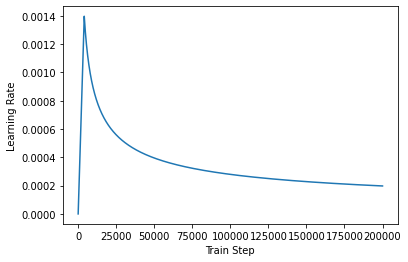

In [51]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

    
sample_learning_rate = CustomSchedule(d_model=128)
plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")


In [52]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9
)


def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)


model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])


EPOCHS = 10
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/10
689/689 [==============================] - 44s 55ms/step - loss: 2.1113 - accuracy: 0.0421
Epoch 2/10
689/689 [==============================] - 38s 55ms/step - loss: 1.5026 - accuracy: 0.0785
Epoch 3/10
689/689 [==============================] - 38s 55ms/step - loss: 1.3985 - accuracy: 0.0856
Epoch 4/10
689/689 [==============================] - 38s 55ms/step - loss: 1.3389 - accuracy: 0.0900
Epoch 5/10
689/689 [==============================] - 38s 55ms/step - loss: 1.2877 - accuracy: 0.0941
Epoch 6/10
689/689 [==============================] - 38s 55ms/step - loss: 1.2401 - accuracy: 0.0979
Epoch 7/10
689/689 [==============================] - 38s 55ms/step - loss: 1.1853 - accuracy: 0.1021
Epoch 8/10
689/689 [==============================] - 38s 55ms/step - loss: 1.1241 - accuracy: 0.1073
Epoch 9/10
689/689 [==============================] - 38s 55ms/step - loss: 1.0665 - accuracy: 0.1131
Epoch 10/10
689/689 [==============================] - 38s 55ms/step - loss: 1.014

In [53]:
def decoder_inference(sentence):
    sentence = preprocess_sentence(sentence)

    # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
    # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0
    )

    # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
    # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)

    # 디코더의 인퍼런스 단계
    for i in range(MAX_LENGTH):
        # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]

        # 현재 예측한 단어의 정수
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
        # 이 output_sequence는 다시 디코더의 입력이 됩니다.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)


def sentence_generation(sentence):
    # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
    prediction = decoder_inference(sentence)

    # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
    predicted_sentence = tokenizer.decode(
        [i for i in prediction if i < tokenizer.vocab_size]
    )

    print("입력 : {}".format(sentence))
    print("출력 : {}".format(predicted_sentence))

    return predicted_sentence

In [54]:
sentence_generation('Where have you been?')

입력 : Where have you been?
출력 : i m not going to be alone .


'i m not going to be alone .'

In [55]:
sentence_generation("It's a trap")

입력 : It's a trap
출력 : i m not sure it s not the point .


'i m not sure it s not the point .'